In [4]:
import pandas as pd
import pickle
with open("results.list") as f:
    rlis = pickle.load(f)
labels = ['cloud', 'number_of_invocation', 'matrix_size', 'attempt', 'idx', 'gflops','vms','rss', 'elapsed_import', 'elapsed_total', 'elapsed']
df = pd.DataFrame.from_records(rlis, columns=labels)

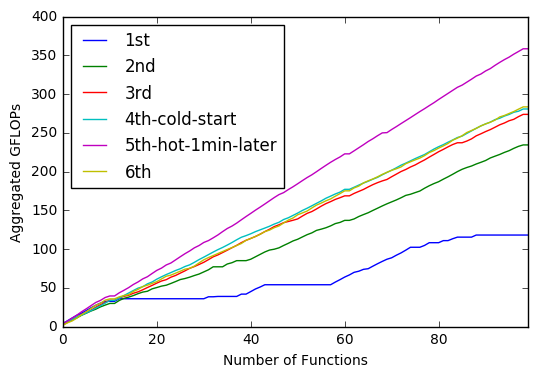

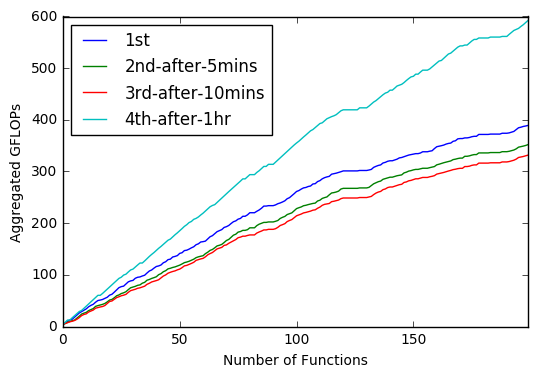

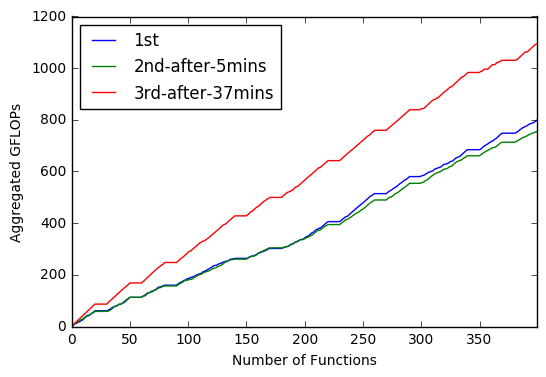

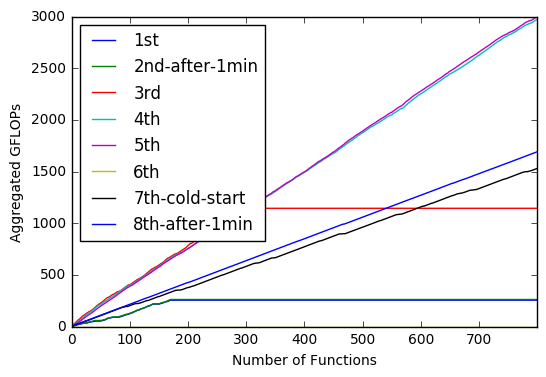

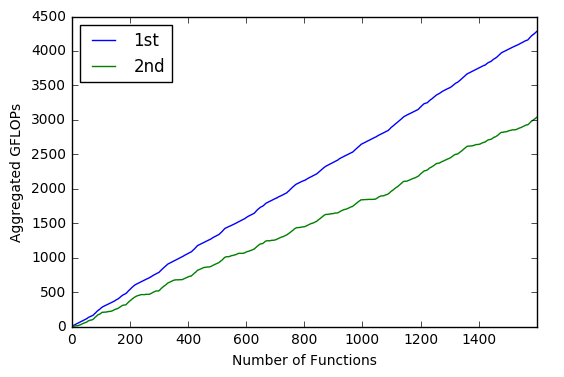

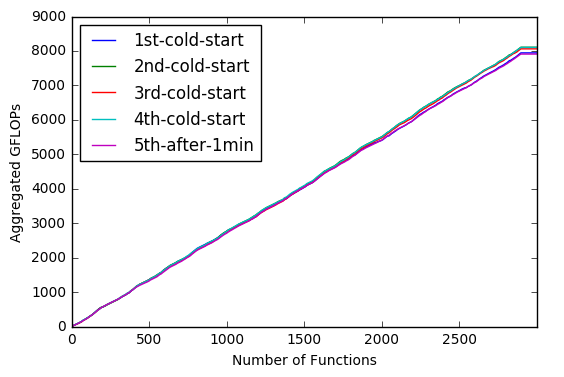

In [5]:
azure = {}
for i in rlis:
    batch_size = i[1]
    if batch_size not in azure:
        azure[batch_size] = {}
    if i[3] not in azure[batch_size]:
        azure[batch_size][i[3]] = [i[4:]]
    else:
        azure[batch_size][i[3]].append(i[4:])
            
akeys = azure.keys()
akeys.sort()
azure_df = {}
for bsize in akeys:
    # 100,200,400,800,1600,3000
    keys = azure[bsize].keys()
    keys.sort()

    ndata = []
    for i in range(bsize):
        tmp = []
        for j in keys:
            try:
                gflops = azure[bsize][j][i][1]
            except IndexError:
                gflops = 0.0
            tmp.append(gflops)
        ndata.append(tmp)
    df=pd.DataFrame(ndata, columns=keys)
    df=df.cumsum()
    ax = df.plot()
    ax.set_xlabel("Number of Functions")
    ax.set_ylabel("Aggregated GFLOPs")



In [168]:
with open("files/aws.lambda.comp_1536_2.log.gflops") as f:
    aws_gflops = json.load(f)
len(aws_gflops)
df=pd.DataFrame(aws_gflops, columns=['aws 10k'])
df=df.cumsum()

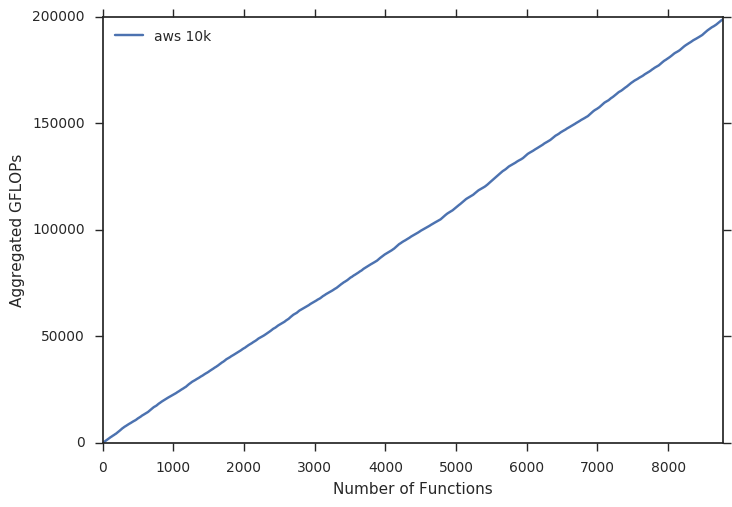

In [169]:
ax = df.plot()
ax.set_xlabel("Number of Functions")
ax.set_ylabel("Aggregated GFLOPs")


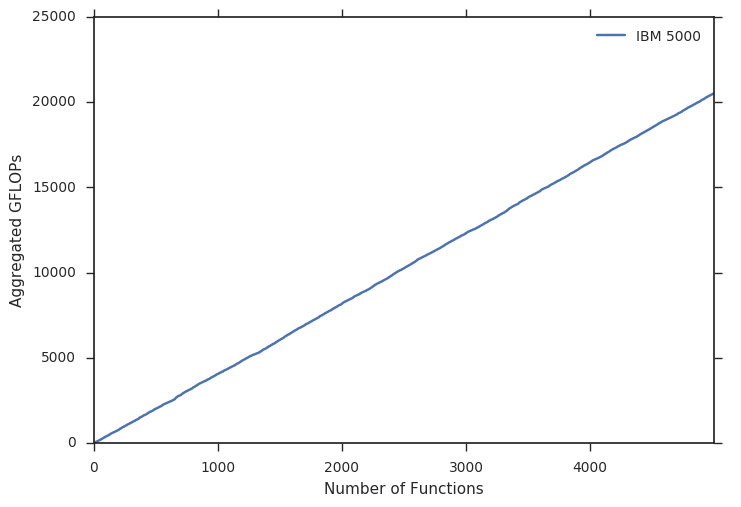

In [174]:
with open("files/invoke.REST.5000.gflopsopenwhisk.1.1024.log.result") as f:
    ibm_gflops = json.load(f)
df=pd.DataFrame(ibm_gflops, columns=['IBM 5000'])
df=df.cumsum()
ax = df.plot()
ax.set_xlabel("Number of Functions")
ax.set_ylabel("Aggregated GFLOPs")


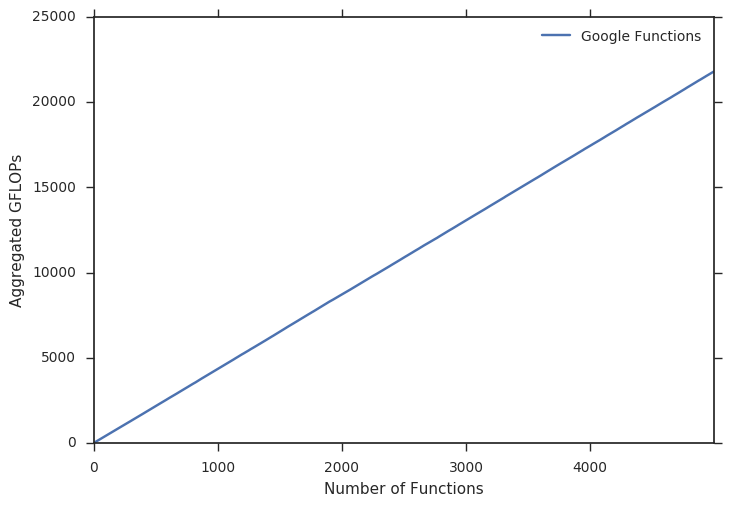

In [180]:
with open("files/invoke.REST.5000.flops.1.1024.log.gflops") as f:
    gfunc_gflops = json.load(f)
df=pd.DataFrame(gfunc_gflops, columns=['Google Functions'])
df=df.cumsum()
ax = df.plot()
ax.set_xlabel("Number of Functions")
ax.set_ylabel("Aggregated GFLOPs")

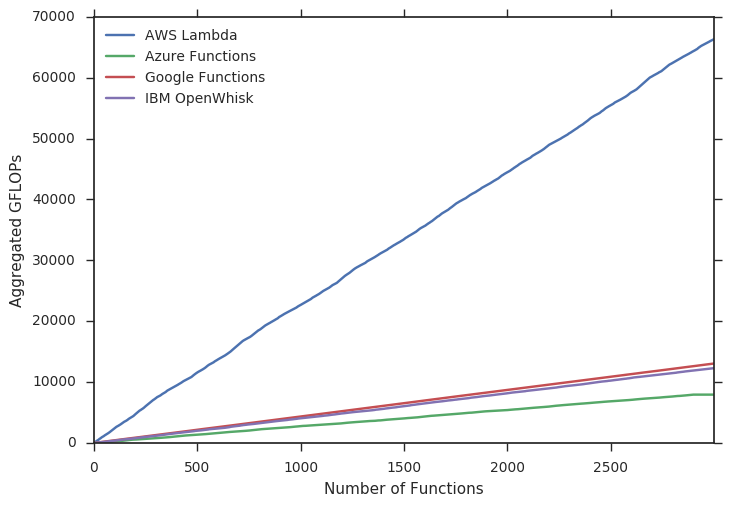

In [183]:
df=pd.DataFrame({"Google Functions":gfunc_gflops[:3000], "AWS Lambda": aws_gflops[:3000], "IBM OpenWhisk": ibm_gflops[:3000], "Azure Functions": new_ndata[:3000]})
df=df.cumsum()
ax = df.plot()
ax.set_xlabel("Number of Functions")
ax.set_ylabel("Aggregated GFLOPs")

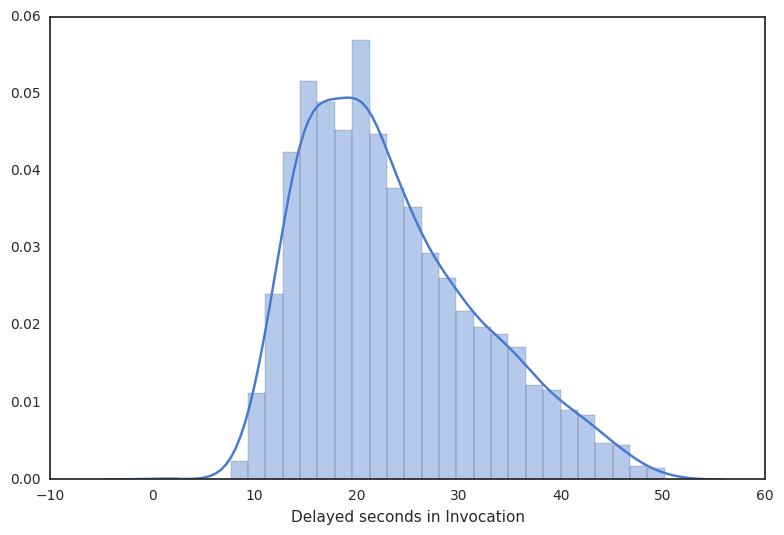

In [228]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

with open('files/invoke_100_1_2899_12_512.result') as f:
    azure3000 = json.load(f)

loop = 12
mat = 512
ndata = []
ndatag = []
err_cnt = 0
for k, v in azure3000.iteritems():
    try:
        result = v['result'].strip('"').split(",")
    except AttributeError:
        err_cnt += 1
        continue
    if len(result) != 5:
        #print result
        err_cnt += 1
        continue
    result = [ float(x) for x in result ]
    gflops = result[0]
    if gflops != 0.0:
        gflops_time = (mat**3*2*loop) / (gflops * 1e9)
    else:
        gflops_time = 0
    import_time = result[3]
    func_time = result[4]
    #func_time_except_import = func_time - import_time
    overhead = func_time - gflops_time
    if overhead < 0:
        print gflops, gflops_time, import_time, func_time
    # overhead and import_time should be identical or almost
    ndata.append(overhead)
    ndatag.append(gflops)
#df=pd.DataFrame(ndata)
#df=df.cumsum()
#df.plot()
ax = sns.distplot(ndata)
ax.set_xlabel('Delayed seconds in Invocation')
plt.tight_layout()